# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
cities_df = pd. DataFrame(cities)
df = cities_df.rename(columns={0:"Name"})
df.head()

,Name
0,datong
1,ushuaia
2,nara
3,morondava
4,gat


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("-----------------------------")

# Iterate through the rows of the Data Frame, taking the name as the "Key" and searching the weather of each one. 
for index, row in df.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    # To obtain results in "imperial" system. If metric system wanted, then change units to "metric"
    units = "imperial"
    query_url = f"{base_url}appid={api_key}&units={units}&q="
    city = row['Name']
    response = requests.get(query_url + city).json()
    
    # Complete the Data Frame with columns wanted. If there's any city whit lacking information, pass to the next one \
    # so our table has no empty cell
    
    try:    
         
        df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        df.loc[index,"Country"] = response["sys"]["country"]
        df.loc[index,"Date"] = response["dt"]
        df.loc[index,"Humidity"] = response["main"]["humidity"]
        df.loc[index, "Lat"] = response['coord']['lat']
        df.loc[index,"Lng"] = response["coord"]["lon"]
        df.loc[index,"Max Temp"] = response["main"]["temp_max"]
        df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        print(f"Processing Record {index} of Set 1 | {city}")    
            
    except (KeyError, IndexError):
        pass
        print("City not found. Skipping...")
        



Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | datong
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | nara
Processing Record 3 of Set 1 | morondava
Processing Record 4 of Set 1 | gat
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | lorengau
Processing Record 8 of Set 1 | eyl
Processing Record 9 of Set 1 | abashiri
City not found. Skipping...
Processing Record 11 of Set 1 | hoima
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | krasnokamensk
Processing Record 17 of Set 1 | saint-augustin
City not found. Skipping...
Processing Record 19 of Set 1 | bandarbeyla
City not found. Skipping...
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | vaini
City not found. Skipping...
Processing Record 24 of

Processing Record 206 of Set 1 | coquimbo
Processing Record 207 of Set 1 | avanigadda
Processing Record 208 of Set 1 | kerema
Processing Record 209 of Set 1 | okhotsk
Processing Record 210 of Set 1 | usak
Processing Record 211 of Set 1 | port macquarie
Processing Record 212 of Set 1 | chumikan
Processing Record 213 of Set 1 | thompson
Processing Record 214 of Set 1 | dongkan
Processing Record 215 of Set 1 | praya
City not found. Skipping...
Processing Record 217 of Set 1 | jijiga
Processing Record 218 of Set 1 | felanitx
Processing Record 219 of Set 1 | muros
City not found. Skipping...
Processing Record 221 of Set 1 | cayenne
Processing Record 222 of Set 1 | rawson
Processing Record 223 of Set 1 | bubaque
Processing Record 224 of Set 1 | suntar
Processing Record 225 of Set 1 | turayf
Processing Record 226 of Set 1 | vila velha
Processing Record 227 of Set 1 | dubrovka
Processing Record 228 of Set 1 | karasjok
Processing Record 229 of Set 1 | east london
Processing Record 230 of Set 1 

Processing Record 411 of Set 1 | la grande
Processing Record 412 of Set 1 | clarence town
Processing Record 413 of Set 1 | oksfjord
Processing Record 414 of Set 1 | port hedland
Processing Record 415 of Set 1 | waldoboro
Processing Record 416 of Set 1 | iqaluit
Processing Record 417 of Set 1 | port hardy
Processing Record 418 of Set 1 | makakilo city
Processing Record 419 of Set 1 | boyabat
Processing Record 420 of Set 1 | carlsbad
Processing Record 421 of Set 1 | pavilosta
Processing Record 422 of Set 1 | uribia
Processing Record 423 of Set 1 | esperance
Processing Record 424 of Set 1 | ternate
Processing Record 425 of Set 1 | mitu
Processing Record 426 of Set 1 | kushiro
Processing Record 427 of Set 1 | masterton
Processing Record 428 of Set 1 | ilhabela
Processing Record 429 of Set 1 | tsimlyansk
Processing Record 430 of Set 1 | vallenar
Processing Record 431 of Set 1 | edmonton
City not found. Skipping...
Processing Record 433 of Set 1 | jalu
Processing Record 434 of Set 1 | pacifi

### Convert Raw Data to DataFrame

In [5]:
# Summarize columns object count 
df.count()

Name          595
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

In [6]:
# Leave behing (dropping) all rows that has any of the columns 
df = df.dropna()

# Poer al ultimo!!!!!!!!!!!!!!!!!!!!!!!!!!!!Tranform column "Date" from exponential to integer 
df["Date"] = df["Date"].astype(int)

# Showing complete DataFrame
df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,datong,0.0,CN,1551568073,70.0,40.09,113.30,22.85,2.71
1,ushuaia,40.0,AR,1551564000,66.0,-54.81,-68.31,53.60,16.11
2,nara,90.0,JP,1551567885,96.0,34.68,135.80,48.20,6.93
3,morondava,80.0,MG,1551568074,99.0,-20.30,44.28,79.86,1.81
4,gat,0.0,SN,1551565800,49.0,14.69,-16.54,68.00,16.11


In [7]:
# Transform "Date" column from Unix into DayTime
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'],unit='s')

df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,datong,0.0,CN,2019-03-02 23:07:53,70.0,40.09,113.30,22.85,2.71
1,ushuaia,40.0,AR,2019-03-02 22:00:00,66.0,-54.81,-68.31,53.60,16.11
2,nara,90.0,JP,2019-03-02 23:04:45,96.0,34.68,135.80,48.20,6.93
3,morondava,80.0,MG,2019-03-02 23:07:54,99.0,-20.30,44.28,79.86,1.81
4,gat,0.0,SN,2019-03-02 22:30:00,49.0,14.69,-16.54,68.00,16.11


In [8]:
# Save Data into a csv
df.to_csv("WeatherPy.csv")

### Plotting the Data

#### Latitude vs. Temperature Plot

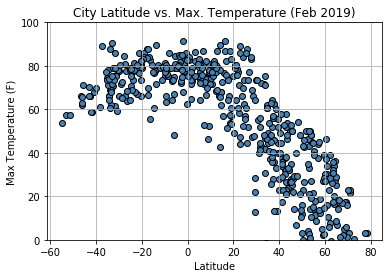

In [9]:
##Scarett plot Latitude vs. Max Temp 

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Max Temp"]

# Plot title and labels 
plt.title("City Latitude vs. Max. Temperature (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Limit the y axis 
plt.ylim(0, 100)

# Show Grid
plt.grid()

# Configure the plot
plt.scatter(x_axis, y_axis, marker="o", color="steelblue",edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Temperature Plot.png")

#Show plot 
plt.show()

#### Latitude vs. Humidity Plot

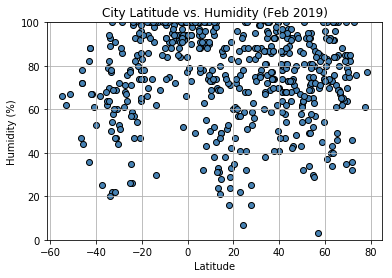

In [14]:
## Scarett plot Latitude vs. Humidity

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Humidity"]

# Plot title and labels 
plt.title("City Latitude vs. Humidity (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Limit the y axis
plt.ylim(0, 100)

# Show Grid
plt.grid()

# Configure the plot
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Humidity Plot.png")

#Show plot 
plt.show()

In [11]:
#### Latitude vs. Cloudiness Plot

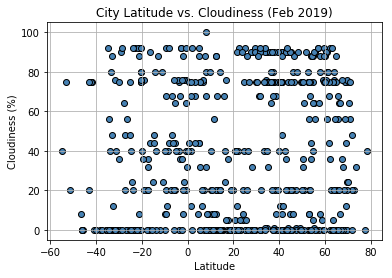

In [12]:
## Scarett plot Latitude vs. Cloudiness Plot

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Cloudiness"]

# Plot title and labels 
plt.title("City Latitude vs. Cloudiness (Feb 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show Grid
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Cloudiness Plot.png")

#Show plot 
plt.show()

#### Latitude vs. Wind Speed Plot

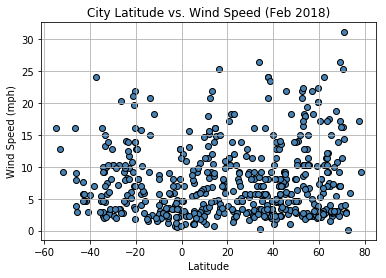

In [13]:
## Scarett plot Latitude vs. Wind Speed Plot

# Obtain data form the DataFrame to x and y axis 
x_axis = df["Lat"]
y_axis = df["Wind Speed"]

# Plot title and labels 
plt.title("City Latitude vs. Wind Speed (Feb 2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Show Grid
plt.grid()
plt.scatter(x_axis, y_axis, marker="o", color="steelblue", edgecolors="black")

# Save the figure into png
plt.savefig("Latitude vs. Wind Speed Plot.png")

#Show plot 
plt.show()